In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])
batch_size = 32
kernel_size = 5
learning_rate = 0.001
epochs=35

train_data = torchvision.datasets.CIFAR10(root='./data',train=True, download=True,transform=transform)
test_data = torchvision.datasets.CIFAR10(root='./data',train=True, download=True,transform=transform)

loaders = {
    'train': torch.utils.data.DataLoader(train_data, batch_size = batch_size, shuffle = True, num_workers=2),
    'test': torch.utils.data.DataLoader(test_data, batch_size = batch_size, shuffle = True, num_workers=2),
}

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
image, label = train_data[0]
image
image.size() 
# have 3 channels rgb, and 32 * 32 px

torch.Size([3, 32, 32])

In [3]:
class_names = ['plane', 'car', 'bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 12, kernel_size)
        self.pool= nn.MaxPool2d(2,2)

        self.conv2 = nn.Conv2d(12, 24, kernel_size)

        self.fc1 = nn.Linear(24 * kernel_size * kernel_size, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self,x,return_features=False):
        feature_maps = {}

        x = F.relu(self.conv1(x))
        x = self.pool(x)
        if return_features:
            feature_maps['conv1'] = x

        x = F.relu(self.conv2(x))
        x = self.pool(x)
        if return_features:
            feature_maps['conv2'] = x
        x= torch.flatten(x,1)
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        
        if return_features:
            return x, feature_maps
        else:
            return x

In [6]:
net = NeuralNet()
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate,momentum=0.9)

In [ ]:
train_loss = []
train_acc = []
test_loss = []
test_acc = []
losses = []

for epoch in range(epochs):
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    net.train()
    for i, data in enumerate(loaders['train']):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        losses.append(loss.item())
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    avg_train_loss = running_loss / len(loaders['train'])
    train_accuracy = 100 * correct_train / total_train
    train_loss.append(avg_train_loss)
    train_acc.append(train_accuracy)

    net.eval()
    running_test_loss = 0.0
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for data in loaders['test']:
            images, labels = data
            outputs = net(images)
            loss = loss_function(outputs, labels)
            running_test_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    avg_test_loss = running_test_loss / len(loaders['test'])
    test_accuracy = 100 * correct_test / total_test
    test_loss.append(avg_test_loss)
    test_acc.append(test_accuracy)

    print(f'Train Epoch {epoch + 1}: Training loss: {avg_train_loss:.4f}, '
          f'Training Accuracy: {train_accuracy:.2f}%, '
          f'Test set: Average Loss: {avg_test_loss:.4f}, '
          f'Test Accuracy: {correct_test}/{total_test} ({test_accuracy:.2f}%)')

Train Epoch 1: Training loss: 2.2377, Training Accuracy: 17.75%, Test set: Average Loss: 1.9765, Test Accuracy: 13475/50000 (26.95%)
Train Epoch 2: Training loss: 1.7668, Training Accuracy: 35.02%, Test set: Average Loss: 1.6253, Test Accuracy: 19672/50000 (39.34%)
Train Epoch 3: Training loss: 1.5378, Training Accuracy: 43.93%, Test set: Average Loss: 1.4672, Test Accuracy: 23354/50000 (46.71%)
Train Epoch 4: Training loss: 1.4128, Training Accuracy: 48.58%, Test set: Average Loss: 1.3315, Test Accuracy: 26029/50000 (52.06%)
Train Epoch 5: Training loss: 1.3129, Training Accuracy: 52.73%, Test set: Average Loss: 1.2669, Test Accuracy: 27348/50000 (54.70%)
Train Epoch 6: Training loss: 1.2278, Training Accuracy: 56.05%, Test set: Average Loss: 1.1565, Test Accuracy: 29455/50000 (58.91%)
Train Epoch 7: Training loss: 1.1561, Training Accuracy: 58.79%, Test set: Average Loss: 1.1192, Test Accuracy: 30231/50000 (60.46%)
Train Epoch 8: Training loss: 1.0904, Training Accuracy: 61.33%, Test

In [8]:
torch.save(net.state_dict(), 'trained_net.pth')

Train Loss: [2.2377204244440363, 1.7667876355402452, 1.5378395424618296, 1.4128481384202294, 1.3129425560596732, 1.2278247776507416, 1.1560872843535528, 1.0903609930820672, 1.0442442805509269, 0.9916344250117978, 0.9492768741767527, 0.90931326137547, 0.870638426019073, 0.8388833789320536, 0.8038346733104245, 0.7757029153945274, 0.7472811733120462, 0.7187253387021622, 0.694551216110692, 0.6674067779603251, 0.6435601355189783, 0.6164257841581575, 0.5930545527013692, 0.5712224236109741, 0.5471859444755053, 0.5283715499663917, 0.5050508706417514, 0.490718360072668, 0.46842929732319033, 0.4453863439293756, 0.426831274843338, 0.41139359928557906, 0.38988279721920716, 0.3664261745342595, 0.35046807798108304]
Test Loss: [1.9764782049986924, 1.6253369740012054, 1.4671537400588575, 1.331505842835798, 1.2669137799045784, 1.1565302265659023, 1.1191906916812988, 1.0640843306225383, 0.9893799506161203, 0.9389632361597231, 0.9285670023123118, 0.8785250099782218, 0.8073818732436773, 0.7902074640405842

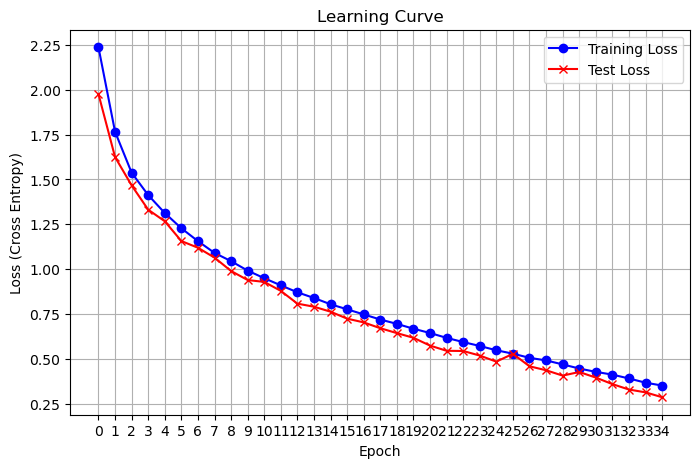

In [ ]:
print("Train Loss:", train_loss)
print("Test Loss:", test_loss)
plt.figure(figsize=(8, 5))
plt.plot(range(epochs), train_loss, label='Training Loss', color='blue', marker='o')
plt.plot(range(epochs), test_loss, label='Test Loss', color='red', marker='x')
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss (Cross Entropy)')
plt.legend()
plt.grid()
plt.xticks(range(epochs))
plt.show()

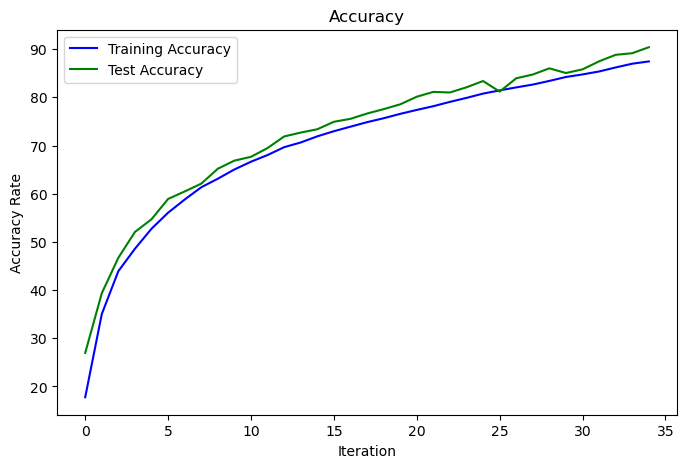

In [ ]:
plt.figure(figsize=(8, 5))
plt.title('Accuracy')
plt.plot(train_acc, label="Training Accuracy", c='b')
plt.plot(test_acc, label="Test Accuracy", c='g')
plt.xlabel("Iteration")
plt.ylabel("Accuracy Rate")
plt.legend()
plt.show()

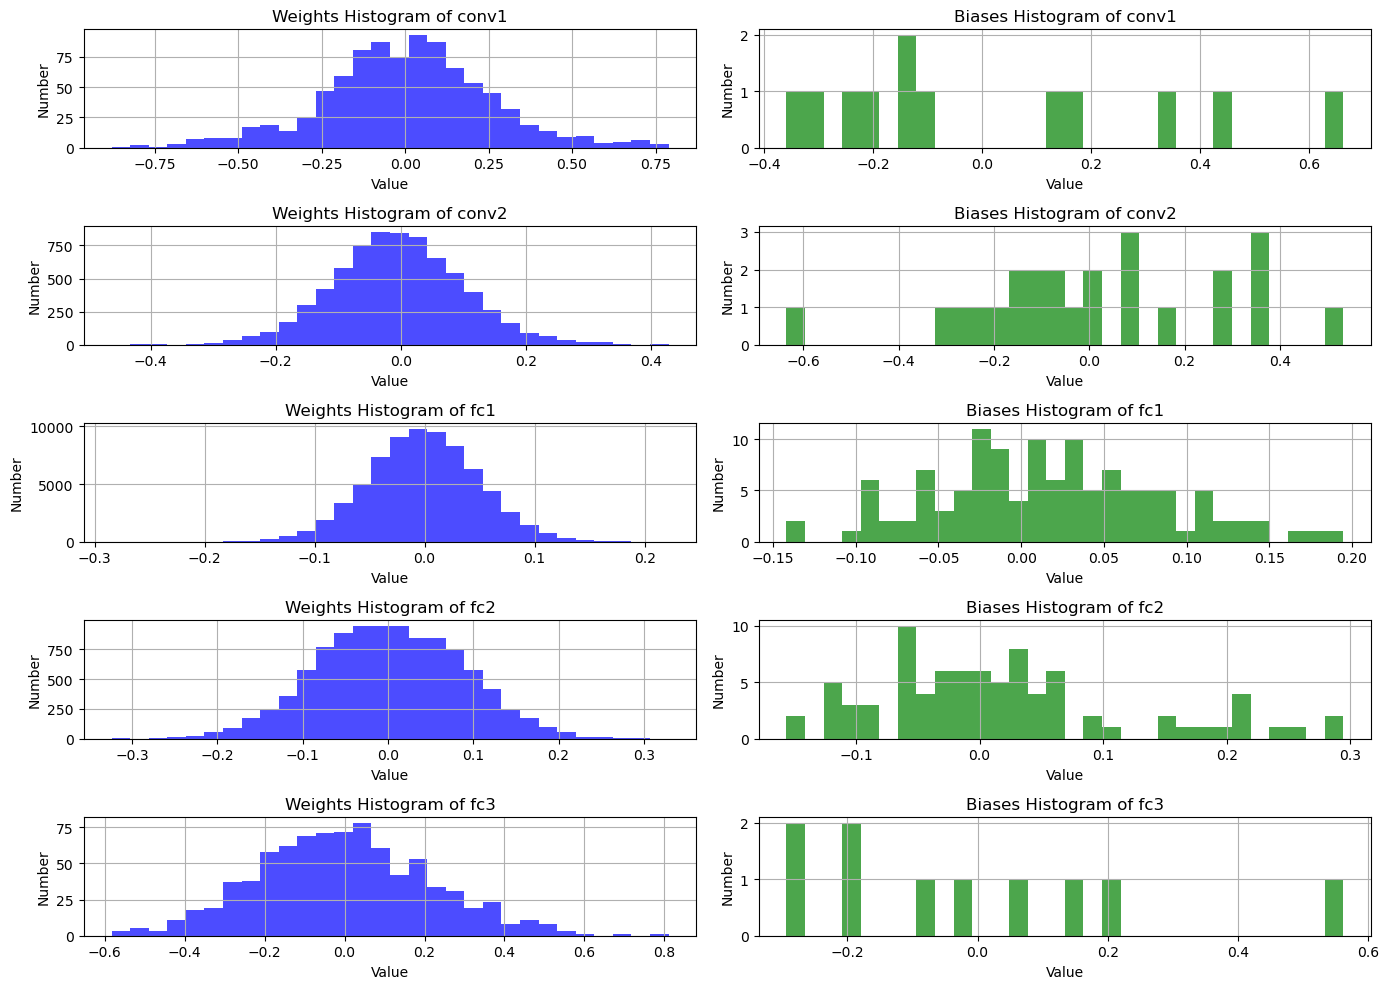

In [ ]:
def weight_bias_hist(net):
    layers = ['conv1', 'conv2', 'fc1', 'fc2', 'fc3']
    
    plt.figure(figsize=(14, 10))
    
    for i, layer_name in enumerate(layers):
        weights = getattr(net, layer_name).weight.data.cpu().numpy().flatten()
        biases = getattr(net, layer_name).bias.data.cpu().numpy()

        plt.subplot(5, 2, i * 2 + 1)
        plt.hist(weights, bins=30, alpha=0.7, color='blue')
        plt.title(f'Weights Histogram of {layer_name}')
        plt.xlabel('Value')
        plt.ylabel('Number')
        plt.grid()

        plt.subplot(5, 2, i * 2 + 2)
        plt.hist(biases, bins=30, alpha=0.7, color='green')
        plt.title(f'Biases Histogram of {layer_name}')
        plt.xlabel('Value')
        plt.ylabel('Number')
        plt.grid()

    plt.tight_layout()
    plt.show()


weight_bias_hist(net)

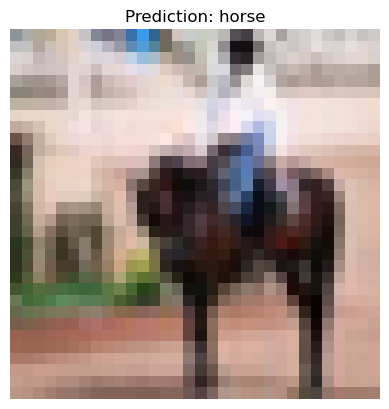

In [ ]:
net.eval()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

data, target = test_data[11]
data = data.unsqueeze(0).to(device)

output = net(data)
prediction = output.argmax(dim=1, keepdim=True).item()

image = data.squeeze(0).cpu().permute(1, 2, 0).numpy()
image = (image - image.min()) / (image.max() - image.min())

plt.imshow(image)
plt.title(f'Prediction: {test_data.classes[prediction]}')
plt.axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.54509807].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.85882354..0.9764706].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.79607844..0.92941177].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.7882353..0.9607843].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.69411767].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9607843..0.6627451].
Clip

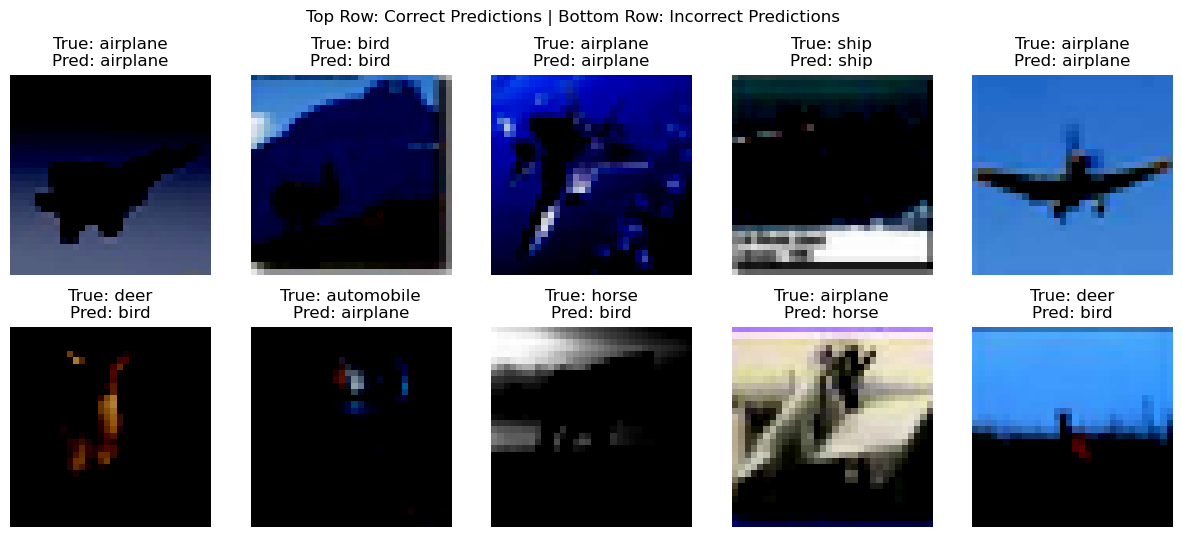

In [ ]:
def predictions(net, data_loader, num_examples=5):
    net.eval()
    correct_images = []
    incorrect_images = []
    classes = data_loader.dataset.classes
    
    with torch.no_grad():
        for data, target in data_loader:
            data, target = data.to(device), target.to(device)
            output = net(data)
            pred = output.argmax(dim=1, keepdim=True).squeeze()

            for i in range(len(pred)):
                if pred[i] == target[i] and len(correct_images) < num_examples:
                    correct_images.append((data[i].cpu(), target[i].item(), pred[i].item()))
                elif pred[i] != target[i] and len(incorrect_images) < num_examples:
                    incorrect_images.append((data[i].cpu(), target[i].item(), pred[i].item()))

                if len(correct_images) >= num_examples and len(incorrect_images) >= num_examples:
                    break

            if len(correct_images) >= num_examples and len(incorrect_images) >= num_examples:
                break

    fig, axs = plt.subplots(2, num_examples, figsize=(15, 6))
    for i, (img, label, pred) in enumerate(correct_images):
        img = img.permute(1, 2, 0).numpy()
        axs[0, i].imshow(img)
        axs[0, i].set_title(f"True: {classes[label]}\nPred: {classes[pred]}")
        axs[0, i].axis('off')

    for i, (img, label, pred) in enumerate(incorrect_images):
        img = img.permute(1, 2, 0).numpy()
        axs[1, i].imshow(img)
        axs[1, i].set_title(f"True: {classes[label]}\nPred: {classes[pred]}")
        axs[1, i].axis('off')

    plt.suptitle('Top Row: Correct Predictions | Bottom Row: Incorrect Predictions')
    plt.show()

predictions(net, loaders['test'])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8901961..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


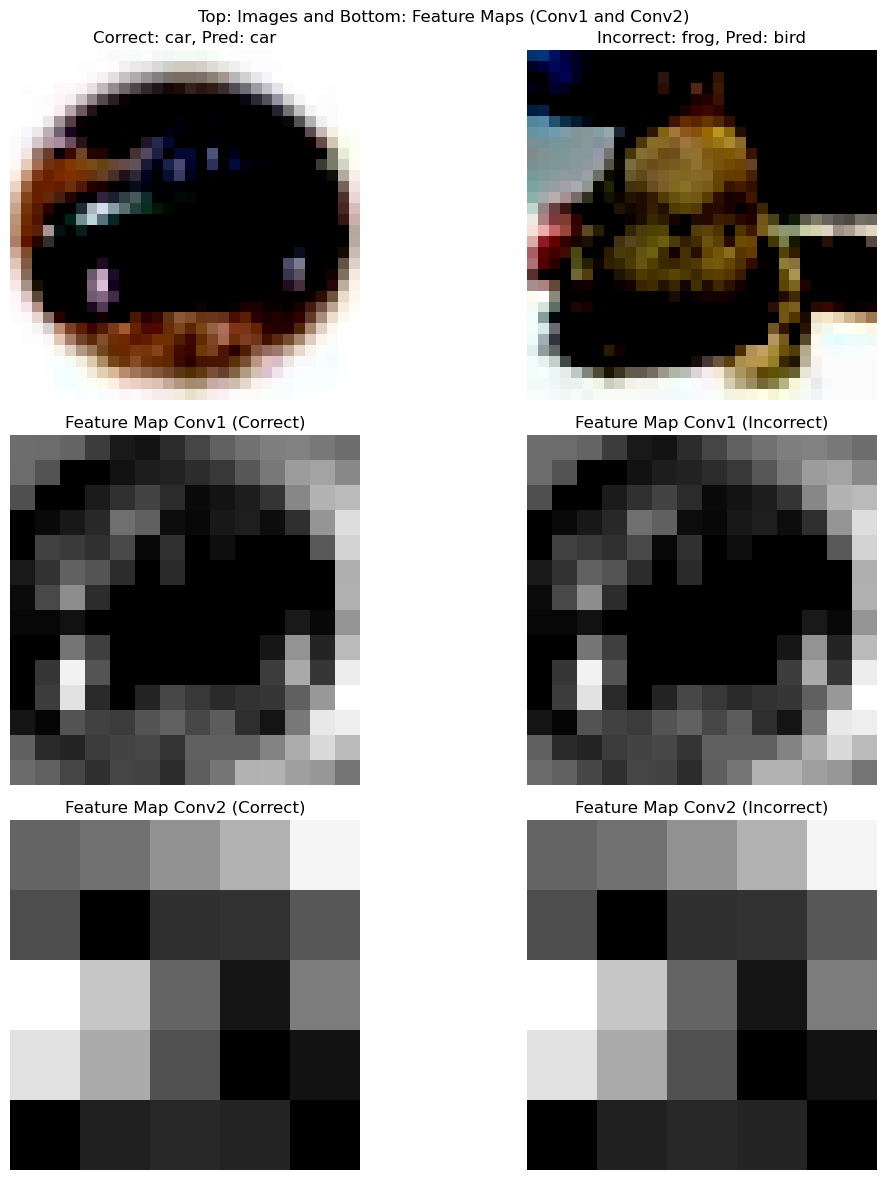

In [ ]:
def feat_map(net, loader):
    net.eval()
    correct_image = None
    incorrect_image = None

    with torch.no_grad():
        for data, target in loader:
            data, target = data.to(device), target.to(device)
            output, feature_maps = net(data, return_features=True)
            pred = output.argmax(dim=1)

            for i in range(len(pred)):
                if correct_image is None and pred[i] == target[i]:
                    correct_image = (data[i].cpu(), target[i].item(), pred[i].item(), feature_maps)
                elif incorrect_image is None and pred[i] != target[i]:
                    incorrect_image = (data[i].cpu(), target[i].item(), pred[i].item(), feature_maps)

                if correct_image is not None and incorrect_image is not None:
                    break
            if correct_image is not None and incorrect_image is not None:
                break

    fig, axs = plt.subplots(3, 2, figsize=(12, 12))

    img, label, pred, feature_maps = correct_image
    img = img.permute(1, 2, 0)
    axs[0, 0].imshow(img)
    axs[0, 0].set_title(f'Correct: {class_names[label]}, Pred: {class_names[pred]}')
    axs[0, 0].axis('off')

    feature_map_conv1 = feature_maps['conv1'][0].cpu().detach().numpy()
    axs[1, 0].imshow(feature_map_conv1[0], cmap='gray')
    axs[1, 0].set_title('Feature Map Conv1 (Correct)')
    axs[1, 0].axis('off')

    feature_map_conv2 = feature_maps['conv2'][0].cpu().detach().numpy()
    axs[2, 0].imshow(feature_map_conv2[0], cmap='gray')
    axs[2, 0].set_title('Feature Map Conv2 (Correct)')
    axs[2, 0].axis('off')

    img, label, pred, feature_maps = incorrect_image
    img = img.permute(1, 2, 0)
    axs[0, 1].imshow(img)
    axs[0, 1].set_title(f'Incorrect: {class_names[label]}, Pred: {class_names[pred]}')
    axs[0, 1].axis('off')

    feature_map_conv1 = feature_maps['conv1'][0].cpu().detach().numpy()
    axs[1, 1].imshow(feature_map_conv1[0], cmap='gray')
    axs[1, 1].set_title('Feature Map Conv1 (Incorrect)')
    axs[1, 1].axis('off')

    feature_map_conv2 = feature_maps['conv2'][0].cpu().detach().numpy()
    axs[2, 1].imshow(feature_map_conv2[0], cmap='gray')
    axs[2, 1].set_title('Feature Map Conv2 (Incorrect)')
    axs[2, 1].axis('off')

    plt.suptitle('Top: Images and Bottom: Feature Maps (Conv1 and Conv2)')
    plt.tight_layout()
    plt.show()

feat_map(net, loaders['test'])


In [ ]:
# L2 regularization coefficient
L2_REG = 1e-4

net = NeuralNet()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate,momentum=0.9,weight_decay=L2_REG)

train_loss = []
train_acc = []
test_loss = []
test_acc = []
losses = []

for epoch in range(epochs):
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    net.train()
    for i, data in enumerate(loaders['train']):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        losses.append(loss.item())
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    avg_train_loss = running_loss / len(loaders['train'])
    train_accuracy = 100 * correct_train / total_train
    train_loss.append(avg_train_loss)
    train_acc.append(train_accuracy)

    net.eval()
    running_test_loss = 0.0
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for data in loaders['test']:
            images, labels = data
            outputs = net(images)
            loss = loss_function(outputs, labels)
            running_test_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    avg_test_loss = running_test_loss / len(loaders['test'])
    test_accuracy = 100 * correct_test / total_test
    test_loss.append(avg_test_loss)
    test_acc.append(test_accuracy)

    print(f'Train Epoch {epoch + 1}: Training loss: {avg_train_loss:.4f}, '
          f'Training Accuracy: {train_accuracy:.2f}%, '
          f'Test set: Average Loss: {avg_test_loss:.4f}, '
          f'Test Accuracy: {correct_test}/{total_test} ({test_accuracy:.2f}%)')

Train Epoch 1: Training loss: 2.2787, Training Accuracy: 14.11%, Test set: Average Loss: 2.1234, Test Accuracy: 10365/50000 (20.73%)
Train Epoch 2: Training loss: 1.8716, Training Accuracy: 31.35%, Test set: Average Loss: 1.6436, Test Accuracy: 19924/50000 (39.85%)
Train Epoch 3: Training loss: 1.5600, Training Accuracy: 42.88%, Test set: Average Loss: 1.5135, Test Accuracy: 23174/50000 (46.35%)
Train Epoch 4: Training loss: 1.4256, Training Accuracy: 48.38%, Test set: Average Loss: 1.3656, Test Accuracy: 25262/50000 (50.52%)
Train Epoch 5: Training loss: 1.3375, Training Accuracy: 51.75%, Test set: Average Loss: 1.3113, Test Accuracy: 26302/50000 (52.60%)
Train Epoch 6: Training loss: 1.2594, Training Accuracy: 54.79%, Test set: Average Loss: 1.2030, Test Accuracy: 28488/50000 (56.98%)
Train Epoch 7: Training loss: 1.1927, Training Accuracy: 57.60%, Test set: Average Loss: 1.1227, Test Accuracy: 30050/50000 (60.10%)
Train Epoch 8: Training loss: 1.1317, Training Accuracy: 59.86%, Test

Train Loss: [2.2786972457143793, 1.8716274496079712, 1.560023748104342, 1.4256216666291177, 1.3374995328033115, 1.2594002192400238, 1.1927034765653555, 1.1316525407960152, 1.0767666071710569, 1.026051933080511, 0.9811578510818921, 0.9366322981762109, 0.9003901484869873, 0.8633928704132121, 0.8291235121678482, 0.7992033438086128, 0.7716558395252728, 0.7420150139967906, 0.712731851440016, 0.6853198948592157, 0.6604552484348044, 0.6386218307991479, 0.611935914420807, 0.5888102135536996, 0.5644738006710015, 0.5434498174863218, 0.5207172331858428, 0.5036449885604782, 0.4807384115568126, 0.45976785684310695, 0.4386969357728958, 0.4230050769368197, 0.40294854530274526, 0.3877312258405519, 0.3716673923612251]
Test Loss: [2.123385526168369, 1.6436170833810964, 1.5134913997244392, 1.3656176096036963, 1.311339910260699, 1.203032498510694, 1.1227034329224, 1.0792968480615988, 1.0517154370678288, 0.9868867779418741, 0.9347989177444541, 0.908329380164906, 0.8513550479977999, 0.8021030012263142, 0.76

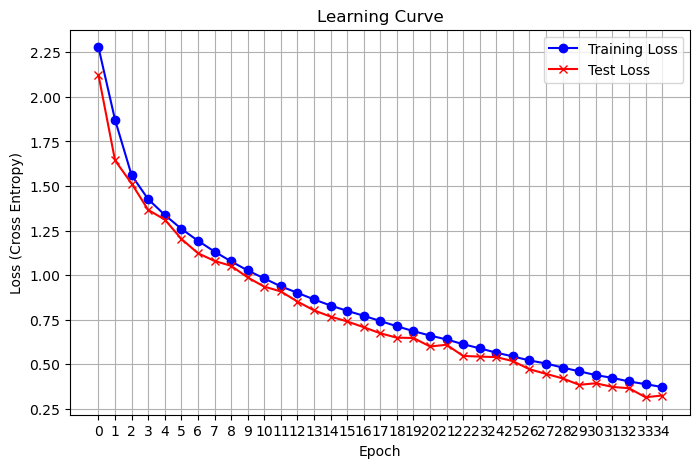

In [ ]:
print("Train Loss:", train_loss)
print("Test Loss:", test_loss)
plt.figure(figsize=(8, 5))
plt.plot(range(epochs), train_loss, label='Training Loss', color='blue', marker='o')
plt.plot(range(epochs), test_loss, label='Test Loss', color='red', marker='x')
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss (Cross Entropy)')
plt.legend()
plt.grid()
plt.xticks(range(epochs))
plt.show()

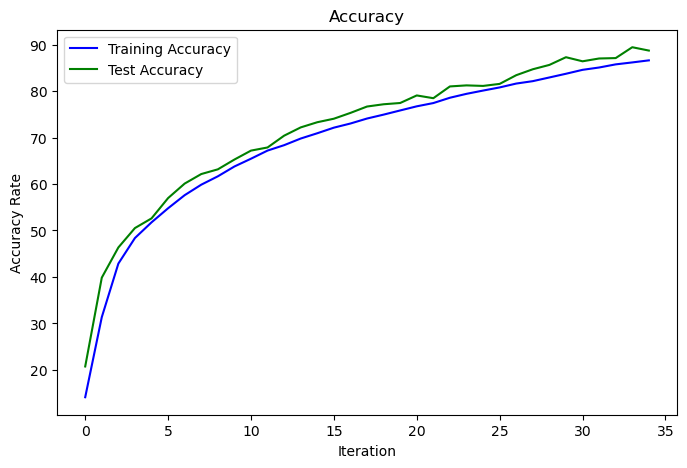

In [ ]:
plt.figure(figsize=(8, 5))
plt.title('Accuracy')
plt.plot(train_acc, label="Training Accuracy", c='b')
plt.plot(test_acc, label="Test Accuracy", c='g')
plt.xlabel("Iteration")
plt.ylabel("Accuracy Rate")
plt.legend()
plt.show()

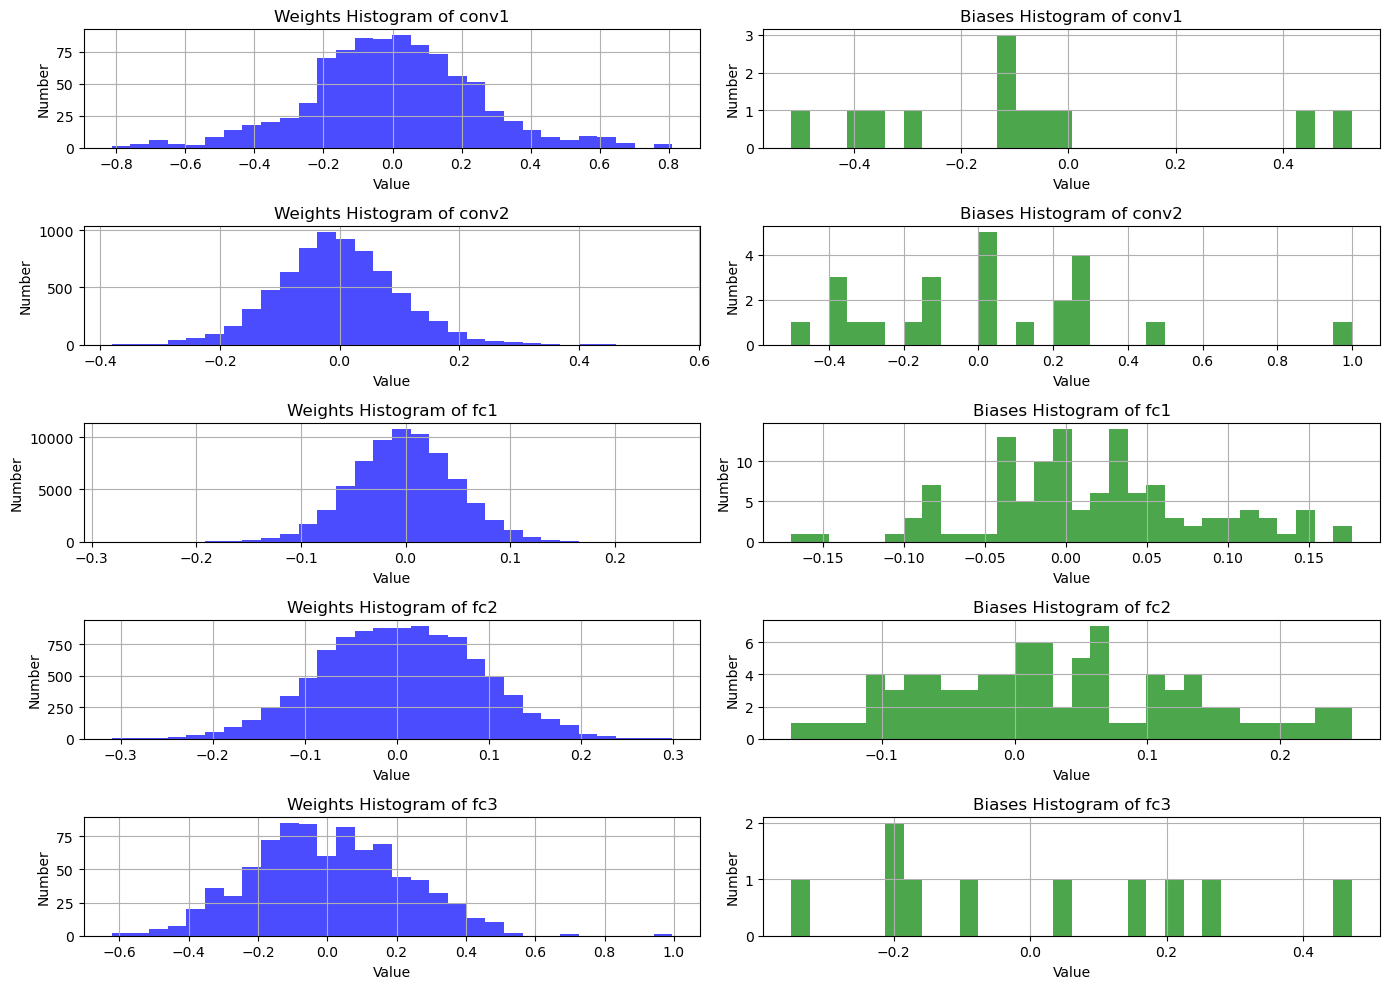

In [ ]:
def weight_bias_hist(net):
    layers = ['conv1', 'conv2', 'fc1', 'fc2', 'fc3']
    
    plt.figure(figsize=(14, 10))
    
    for i, layer_name in enumerate(layers):
        weights = getattr(net, layer_name).weight.data.cpu().numpy().flatten()
        biases = getattr(net, layer_name).bias.data.cpu().numpy()

        plt.subplot(5, 2, i * 2 + 1)
        plt.hist(weights, bins=30, alpha=0.7, color='blue')
        plt.title(f'Weights Histogram of {layer_name}')
        plt.xlabel('Value')
        plt.ylabel('Number')
        plt.grid()

        plt.subplot(5, 2, i * 2 + 2)
        plt.hist(biases, bins=30, alpha=0.7, color='green')
        plt.title(f'Biases Histogram of {layer_name}')
        plt.xlabel('Value')
        plt.ylabel('Number')
        plt.grid()

    plt.tight_layout()
    plt.show()


weight_bias_hist(net)